In [ ]:
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
df.shape

(918, 12)

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [ ]:
df.duplicated().sum()

0

In [ ]:
string_col=df.select_dtypes("string").columns.to_list()

In [ ]:
num_col=df.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


Exploratory Data Analysis

In [ ]:
# Shows the Distribution of Heat Diseases with respect to male and female
fig=px.histogram(df,
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

In [ ]:
fig=px.histogram(df,
                 x="ChestPainType",
                 color="Sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain"
                )
fig.show()

In [ ]:
fig=px.histogram(df,
                 x="Sex",
                 hover_data=df.columns,
                 title="Sex Ratio in the Data")
fig.show()

In [ ]:
fig=px.histogram(df,
                 x="RestingECG",
                 hover_data=df.columns,
                 title="Distribution of Resting ECG")
fig.show()

In [ ]:
#Checking Outlier
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

In [ ]:
fig = px.box(df,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP",color="Sex")
fig.show()

In [ ]:
fig = px.box(df,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol")
fig.show()

In [ ]:
fig = px.box(df,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
fig.show()

In [ ]:
fig = px.box(df,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR")
fig.show()

In [ ]:
#Categorical Values
df[string_col].head()
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(df[col].value_counts())

In [ ]:
dummy = pd.get_dummies(df['Sex'])
dummy = dummy.astype(int)

In [ ]:
dummy.head()

,F,M
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [ ]:
df2 = pd.concat((df, dummy), axis=1)

In [ ]:
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1


In [ ]:
df2 = df2.drop(['Sex'], axis = 1)

In [ ]:
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1


In [ ]:
df2 = df2.drop(['M'], axis = 1)

In [ ]:
# 0 = male ; 1 = female
df2.rename(columns={"F": "Sex"}, inplace=True)

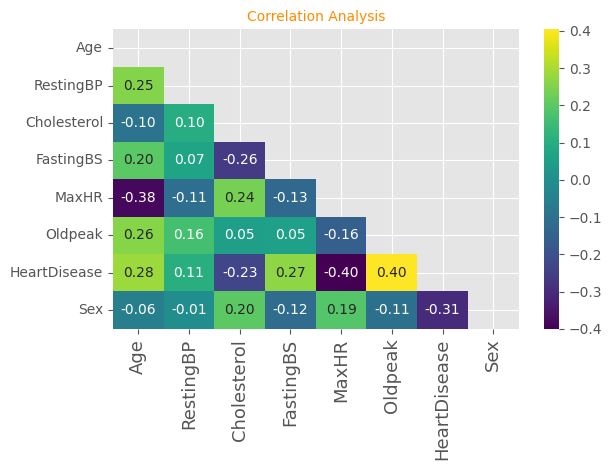

In [ ]:
# Assuming you want to drop non-numeric columns
numeric_df = df2.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
corr = numeric_df.corr()

# Now you can proceed with plotting the correlation matrix
plt.figure(dpi=100)
plt.title('Correlation Analysis', fontsize=25, color='DarkOrange', font='Lucida Calligraphy')
sns.heatmap(corr, annot=True, mask=np.triu(np.ones_like(corr, dtype=bool)), cmap='viridis', fmt=".2f", annot_kws={"size": 10})
plt.xticks(rotation=90, fontsize = 13)
plt.yticks(rotation=0, fontsize = 10)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

[]

<Figure size 1500x1000 with 0 Axes>

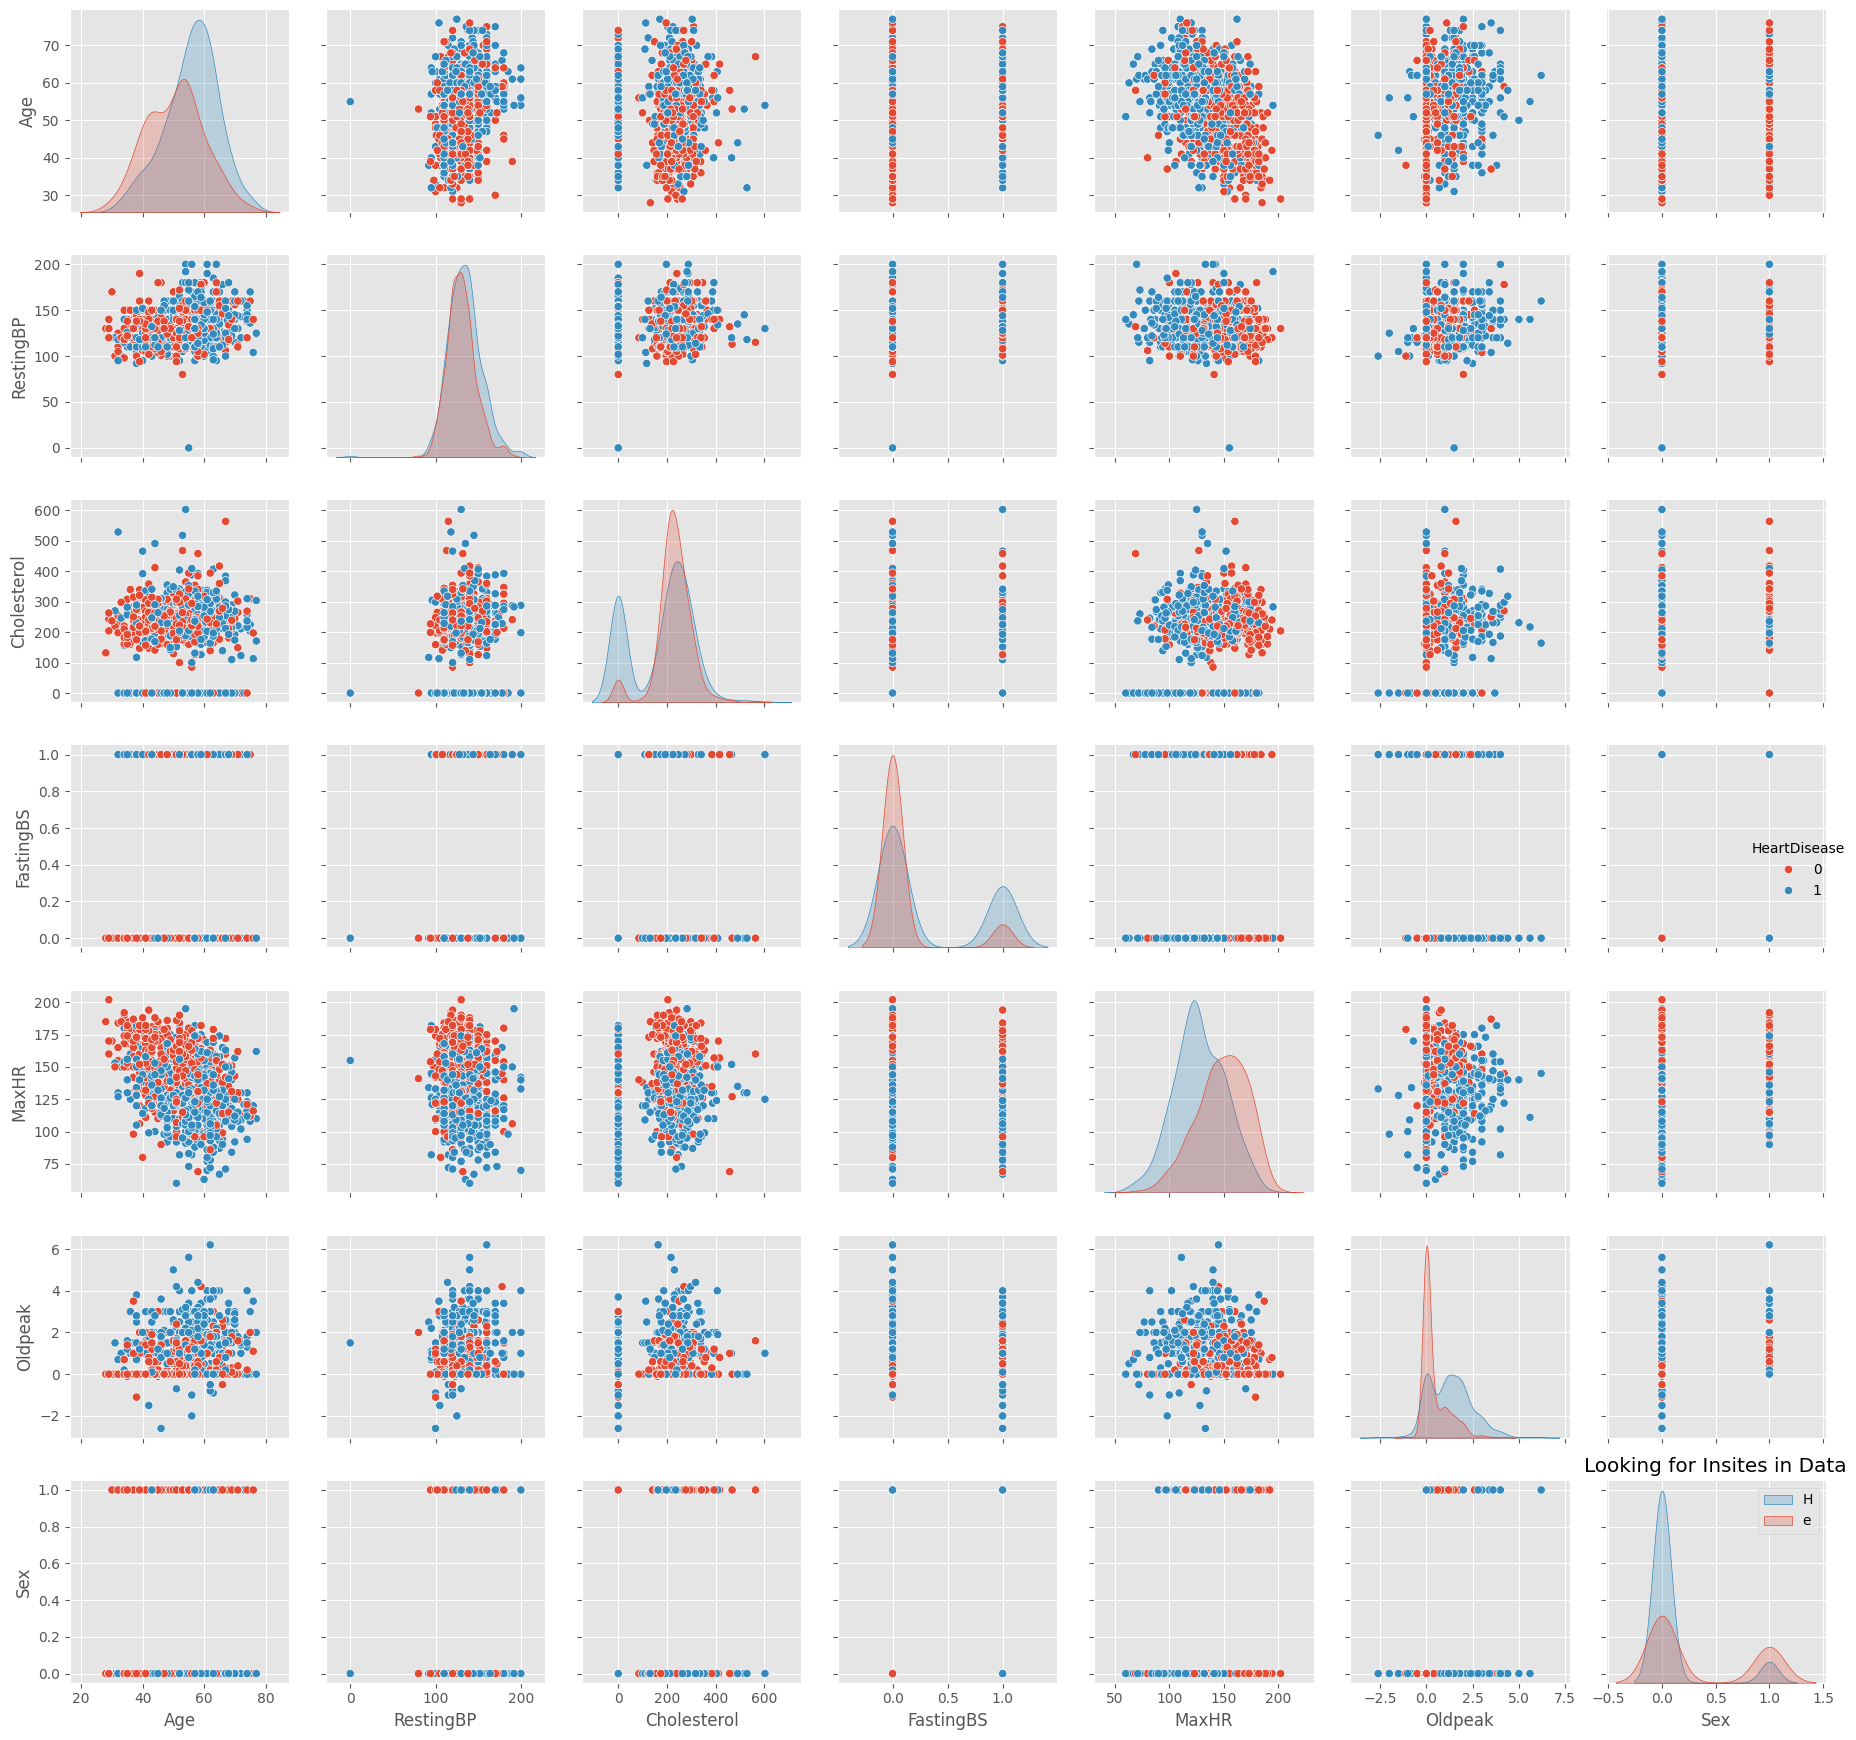

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df2,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

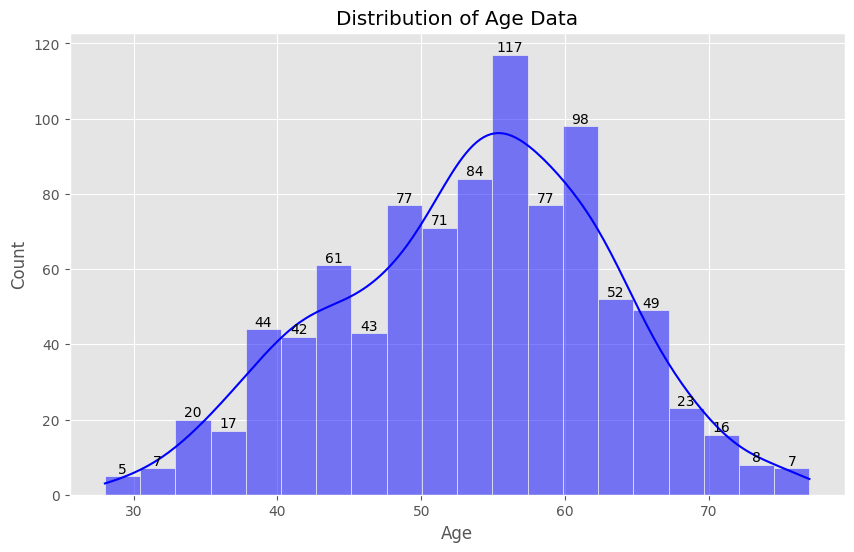

In [ ]:
# Plot 1: Age Distribution Plot
plt.figure(figsize=(10,6))
plt.title("Distribution of Age Data")
sns.histplot(df2['Age'], kde=True, color='blue', bins=20)

# Add the count of each bar for Age
counts, edges = np.histogram(df2['Age'].dropna(), bins=20)
for count, edge in zip(counts, edges):
    plt.text(edge + (edges[1] - edges[0]) / 2, count, str(int(count)),
             ha='center', va='bottom')

plt.show()

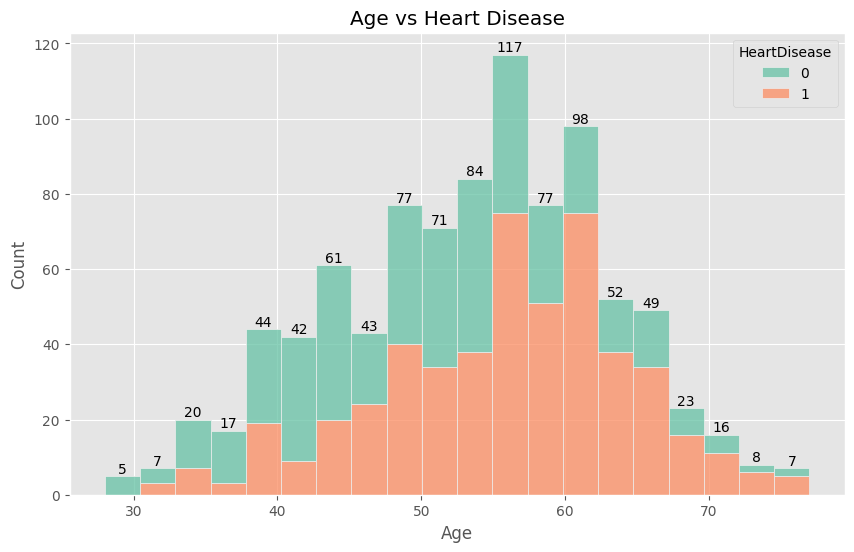

In [ ]:
# Plot 2: Histogram Comparing Age Range with Heart Disease
plt.figure(figsize=(10,6))
plt.title("Age vs Heart Disease")
sns.histplot(data=df2, x="Age", hue="HeartDisease", multiple="stack", bins=20, palette='Set2')

# Add counts for each bar
counts, edges = np.histogram(df2['Age'].dropna(), bins=20)
for count, edge in zip(counts, edges):
    plt.text(edge + (edges[1] - edges[0]) / 2, count, str(int(count)),
             ha='center', va='bottom')

plt.show()

Zero cholesterol values were replaced with the median: 237.00 mg/dL


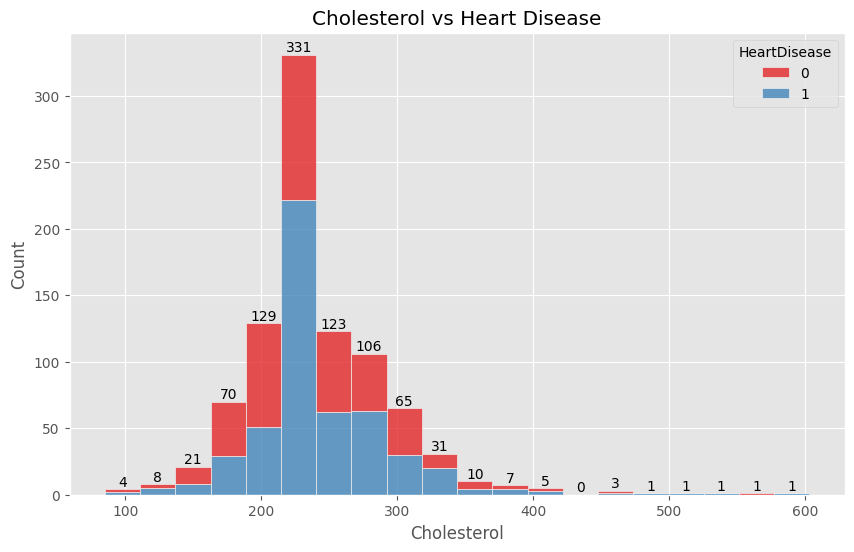

In [ ]:
# Plot 3: Histogram Comparing Cholesterol Range with Heart Disease

# Create a copy of the dataframe to avoid modifying the original
df_cleaned = df2.copy()

# Calculate median/mean excluding zero values
cholesterol_median = df_cleaned[df_cleaned['Cholesterol'] > 0]['Cholesterol'].median()
# Or use mean if preferred:
# cholesterol_mean = df_cleaned[df_cleaned['Cholesterol'] > 0]['Cholesterol'].mean()

# Replace zero values with median/mean
df_cleaned.loc[df_cleaned['Cholesterol'] == 0, 'Cholesterol'] = cholesterol_median

# Optionally, print the replacement value used
print(f"Zero cholesterol values were replaced with the median: {cholesterol_median:.2f} mg/dL")

plt.figure(figsize=(10,6))
plt.title("Cholesterol vs Heart Disease")
sns.histplot(data=df_cleaned, x="Cholesterol", hue="HeartDisease", multiple="stack", bins=20, palette='Set1')

# Add counts for each bar
counts, edges = np.histogram(df_cleaned['Cholesterol'].dropna(), bins=20)
for count, edge in zip(counts, edges):
    plt.text(edge + (edges[1] - edges[0]) / 2, count, str(int(count)),
             ha='center', va='bottom')

plt.show()

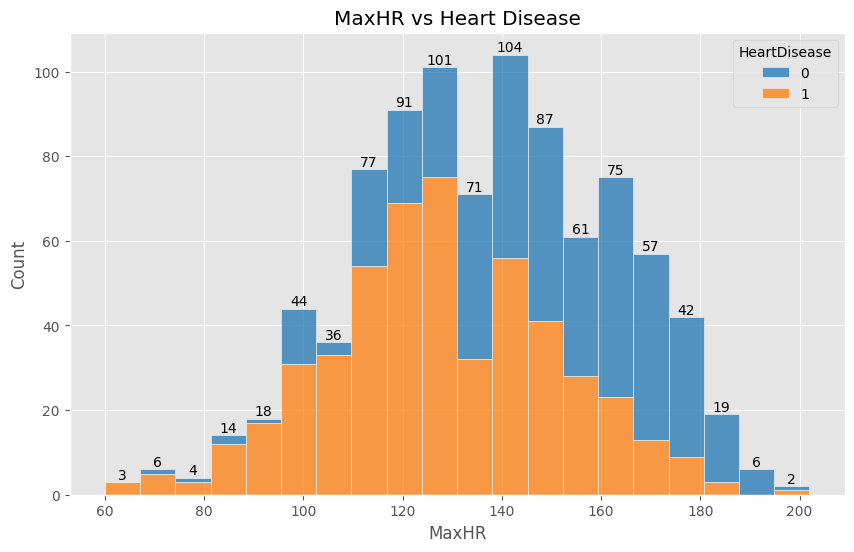

In [ ]:
# Plot 4: Histogram Comparing MaxHR Range with Heart Disease
plt.figure(figsize=(10,6))
plt.title("MaxHR vs Heart Disease")
sns.histplot(data=df2, x="MaxHR", hue="HeartDisease", multiple="stack", bins=20, palette='tab10')

# Add counts for each bar
counts, edges = np.histogram(df2['MaxHR'].dropna(), bins=20)
for count, edge in zip(counts, edges):
    plt.text(edge + (edges[1] - edges[0]) / 2, count, str(int(count)),
             ha='center', va='bottom')

plt.show()

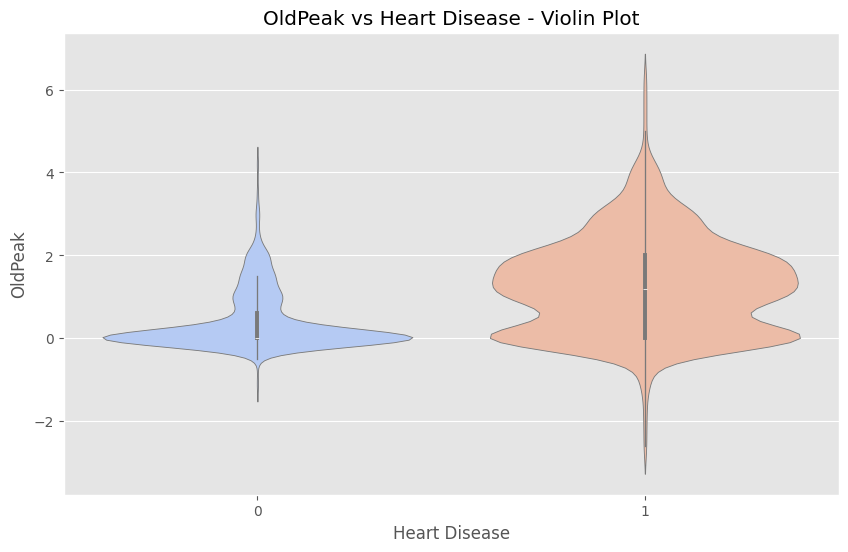

In [ ]:
plt.figure(figsize=(10,6))
plt.title("OldPeak vs Heart Disease - Violin Plot")
sns.violinplot(data=df2, x="HeartDisease", y="Oldpeak", palette='coolwarm')

plt.xlabel("Heart Disease")
plt.ylabel("OldPeak")
plt.show()

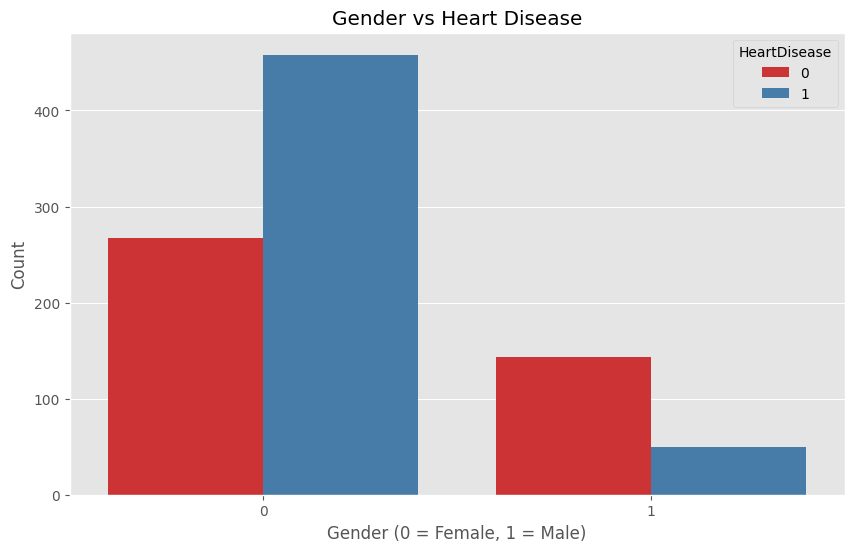

In [ ]:
# Plotting the gender with the number of people affected by heart disease
plt.figure(figsize=(10,6))
plt.title("Gender vs Heart Disease")
sns.countplot(data=df2, x="Sex", hue="HeartDisease", palette='Set1')

# Add labels and formatting
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()

In [ ]:
# Assuming 'M' represents a categorical variable, let's encode it using one-hot encoding
X = pd.get_dummies(df2.drop(['HeartDisease'], axis=1))

# Now, continue with your train-test split and scaling
y = df2['HeartDisease']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X_train)  # Fit on training data

X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

# Convert back to DataFrame
X_train = pd.DataFrame(X_train_std, columns=X.columns)
X_test = pd.DataFrame(X_test_std, columns=X.columns)

# Now you can display the head of X_train and X_test
print(X_train.head())
print(X_test.head())


        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak       Sex  \
0  0.464714  -1.772314     0.294989  -0.525682  0.774609 -0.729460 -0.544949   
1  0.781767  -1.234868    -1.905390   1.902289 -1.173673  0.990283 -0.544949   
2 -0.063707   1.452358    -1.905390   1.902289 -0.605424 -0.819972 -0.544949   
3  0.993136   1.452358     0.257376   1.902289 -1.295440  0.085155 -0.544949   
4  0.993136  -0.159978     1.197709   1.902289 -0.199532  0.809258 -0.544949   

   ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0           0.901975          -0.489267          -0.520852         -0.209529   
1           0.901975          -0.489267          -0.520852         -0.209529   
2          -1.108678          -0.489267           1.919930         -0.209529   
3           0.901975          -0.489267          -0.520852         -0.209529   
4           0.901975          -0.489267          -0.520852         -0.209529   

   RestingECG_LVH  RestingECG_Normal  

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Initialize the SGD Classifier model
sgd = SGDClassifier(random_state=42)

# Fit the model
sgd.fit(X_train, y_train)

# Make predictions
y_pred_SGD = sgd.predict(X_test)

# Calculate metrics
sgd_train = round(sgd.score(X_train, y_train) * 100, 2)
sgd_accuracy = round(accuracy_score(y_test, y_pred_SGD) * 100, 2)
# Specify average='binary' for binary classification, or choose another for multi-class
sgd_f1 = round(f1_score(y_test, y_pred_SGD, average='binary') * 100, 2)

# Print metrics
print("Training Accuracy     :", sgd_train, "%")
print("Model Accuracy Score  :", sgd_accuracy, "%")
print("F1 Score             :", sgd_f1, "%")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_SGD))
print("Classification Report: \n", classification_report(y_test, y_pred_SGD))


Training Accuracy     : 82.87 %
Model Accuracy Score  : 84.78 %
F1 Score             : 86.45 %
Confusion Matrix: 
 [[100  12]
 [ 30 134]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.89      0.83       112
           1       0.92      0.82      0.86       164

    accuracy                           0.85       276
   macro avg       0.84      0.85      0.85       276
weighted avg       0.86      0.85      0.85       276



In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_random, y_test) * 100, 2)
random_forest_f1 = round(f1_score(y_pred_random, y_test) * 100, 2)

print("Training Accuracy     :",random_forest_train,"%")
print("Model Accuracy Score  :",random_forest_accuracy,"%")
print("F1 Score             :", random_forest_f1, "%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_random))
print("Classification_Report: \n",classification_report(y_test,y_pred_random))

Training Accuracy     : 100.0 %
Model Accuracy Score  : 83.15 %
F1 Score             : 85.71 %
Confusion Matrix: 
 [[60 16]
 [15 93]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.80      0.79      0.79        76
           1       0.85      0.86      0.86       108

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier(random_state = 42)
decision.fit(X_train, y_train)
y_pred_Decision = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_Decision, y_test) * 100, 2)
decision_f1 = round(f1_score(y_pred_Decision, y_test) * 100, 2)

print("Training Accuracy     :",decision_train,"%")
print("Model Accuracy Score  :",decision_accuracy,"%")
print("F1 Score             :", decision_f1, "%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_Decision))
print("Classification_Report: \n",classification_report(y_test,y_pred_Decision))

Training Accuracy     : 100.0 %
Model Accuracy Score  : 77.54 %
F1 Score             : 79.33 %
Confusion Matrix: 
 [[ 95  17]
 [ 45 119]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.68      0.85      0.75       112
           1       0.88      0.73      0.79       164

    accuracy                           0.78       276
   macro avg       0.78      0.79      0.77       276
weighted avg       0.80      0.78      0.78       276



In [ ]:
# K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)
knn_f1 = round(f1_score(y_pred_knn, y_test) * 100, 2)

print("Training Accuracy     :",knn_train,"%")
print("Model Accuracy Score  :",knn_accuracy,"%")
print("F1 Score             :", knn_f1, "%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_knn))
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))

Training Accuracy     : 87.69 %
Model Accuracy Score  : 86.59 %
F1 Score             : 88.25 %
Confusion Matrix: 
 [[100  12]
 [ 25 139]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       112
           1       0.92      0.85      0.88       164

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276



In [ ]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression

# Initialize the Logistic Regression model
logistic = LogisticRegression()

# Fit the model on the training data
logistic.fit(X_train, y_train)

# Make predictions on the test data
y_pred_Logistic = logistic.predict(X_test)

# Calculate metrics
logistic_train = round(logistic.score(X_train, y_train) * 100, 2)
logistic_accuracy = round(accuracy_score(y_test, y_pred_Logistic) * 100, 2)

# Choose 'macro' for multi-class, 'binary' for binary classification
logistic_f1 = round(f1_score(y_test, y_pred_Logistic, average='macro') * 100, 2)

# Print metrics
print("Training Accuracy     :", logistic_train, "%")
print("Model Accuracy Score  :", logistic_accuracy, "%")
print("F1 Score              :", logistic_f1, "%")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_Logistic))
print("Classification Report: \n", classification_report(y_test, y_pred_Logistic))


Training Accuracy     : 85.97 %
Model Accuracy Score  : 83.15 %
F1 Score              : 82.52 %
Confusion Matrix: 
 [[59 17]
 [14 94]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.78      0.79        76
           1       0.85      0.87      0.86       108

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.83       184
weighted avg       0.83      0.83      0.83       184



In [ ]:
#Comparing Model

models = pd.DataFrame({
    'Model': [
        'Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Stochastic Gradient Descent'
    ],
    'Training Accuracy': [
        logistic_train, decision_train, random_forest_train, knn_train, sgd_train
    ],
    'Model Accuracy Score': [
        logistic_accuracy, decision_accuracy, random_forest_accuracy, knn_accuracy, sgd_accuracy
    ],
    'Model f1 Score': [
        logistic_f1, decision_f1, random_forest_f1, knn_accuracy, sgd_accuracy
    ]
})

models.sort_values(by='Model f1 Score', ascending = False)

,Model,Training Accuracy,Model Accuracy Score,Model f1 Score
0,Logistic Regression,86.14,88.04,87.72
3,K-Nearest Neighbors,87.69,86.59,86.59
2,Random Forest,100.00,83.15,85.71
4,Stochastic Gradient Descent,82.87,84.78,84.78
1,Decision Tree,100.00,77.54,79.33


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Jellyfish Optimization Algorithm (JOA) for Feature Selection
class JellyfishOptimization:
    def __init__(self, population_size, max_iterations, model, X, y):
        self.population_size = population_size
        self.max_iterations = max_iterations
        self.model = model
        self.X = X
        self.y = y

    def fitness_function(self, individual):
        # Select features based on the individual's binary encoding
        selected_features = [i for i, bit in enumerate(individual) if bit == 1]
        if not selected_features:  # No features selected, return low fitness
            return 0

        X_selected = self.X[:, selected_features]
        skf = StratifiedKFold(n_splits=5)
        accuracy_scores = []
        f1_scores = []

        for train_index, val_index in skf.split(X_selected, self.y):
            X_train, X_val = X_selected[train_index], X_selected[val_index]
            y_train, y_val = self.y[train_index], self.y[val_index]
            self.model.fit(X_train, y_train)
            y_pred = self.model.predict(X_val)
            accuracy_scores.append(accuracy_score(y_val, y_pred))
            f1_scores.append(f1_score(y_val, y_pred, average='binary'))  # Adjust for multi-class if needed

        return np.mean(f1_scores) * 0.6 + np.mean(accuracy_scores) * 0.4

    def optimize(self):
        # Initialize the population
        population = np.random.randint(2, size=(self.population_size, self.X.shape[1]))
        best_individual = None
        best_fitness = 0

        for iteration in range(self.max_iterations):
            for individual in population:
                fitness = self.fitness_function(individual)
                if fitness > best_fitness:
                    best_fitness = fitness
                    best_individual = individual

        return best_individual

# Load and preprocess your dataset
# Assuming 'df' is your DataFrame with the target 'HeartDisease'
X = pd.get_dummies(df2.drop(['HeartDisease'], axis=1)).values
y = df2['HeartDisease'].values

# Apply JOA before splitting data for feature selection
# Logistic Regression is used as the base model for JOA optimization of feature selection
logistic_model = LogisticRegression(random_state=42)

# Reduce population size and iterations for smaller datasets
joa = JellyfishOptimization(population_size=10, max_iterations=20, model=logistic_model, X=X, y=y)
best_features = joa.optimize()

# Use the optimized feature subset
X_optimized = X[:, best_features == 1]

# Train-test split using the optimized feature set
X_train, X_test, y_train, y_test = train_test_split(X_optimized, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models to apply after JOA optimization
models = {
    'Logistic Regression': LogisticRegression(random_state = 42),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SGD Classifier': SGDClassifier()
}

# Model 1: Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

train_accuracy_log_reg = round(log_reg.score(X_train, y_train) * 100, 2)
test_accuracy_log_reg = round(accuracy_score(y_test, y_pred_log_reg) * 100, 2)
f1_log_reg = round(f1_score(y_test, y_pred_log_reg, average='weighted') * 100, 2)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)

print("\n--- Logistic Regression ---")
print(f"Optimized Training Accuracy : {train_accuracy_log_reg}%")
print(f"Optimized Test Accuracy     : {test_accuracy_log_reg}%")
print(f"Optimized F1 Score          : {f1_log_reg}%")
print("Confusion Matrix:")
print(conf_matrix_log_reg)
print("Classification Report:")
print(class_report_log_reg)


--- Logistic Regression ---
Optimized Training Accuracy : 85.97%
Optimized Test Accuracy     : 86.41%
Optimized F1 Score          : 88.48%
Confusion Matrix:
[[63 13]
 [12 96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        76
           1       0.88      0.89      0.88       108

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [ ]:
# Model 2: Decision Tree
dec_tree = DecisionTreeClassifier(random_state = 42)
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)

train_accuracy_dec_tree = round(dec_tree.score(X_train, y_train) * 100, 2)
test_accuracy_dec_tree = round(accuracy_score(y_test, y_pred_dec_tree) * 100, 2)
f1_dec_tree = round(f1_score(y_test, y_pred_dec_tree, average='binary') * 100, 2)
conf_matrix_dec_tree = confusion_matrix(y_test, y_pred_dec_tree)
class_report_dec_tree = classification_report(y_test, y_pred_dec_tree)

print("\n--- Decision Tree ---")
print(f"Optimized Training Accuracy : {train_accuracy_dec_tree}%")
print(f"Optimized Test Accuracy     : {test_accuracy_dec_tree}%")
print(f"Optimized F1 Score          : {f1_dec_tree}%")
print("Confusion Matrix:")
print(conf_matrix_dec_tree)
print("Classification Report:")
print(class_report_dec_tree)


--- Decision Tree ---
Optimized Training Accuracy : 98.23%
Optimized Test Accuracy     : 79.89%
Optimized F1 Score          : 82.95%
Confusion Matrix:
[[57 19]
 [18 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.75        76
           1       0.83      0.83      0.83       108

    accuracy                           0.80       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.80      0.80      0.80       184



In [ ]:
# Model 3: Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

train_accuracy_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
test_accuracy_random_forest = round(accuracy_score(y_test, y_pred_random_forest) * 100, 2)
f1_random_forest = round(f1_score(y_test, y_pred_random_forest, average='binary') * 100, 2)
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
class_report_random_forest = classification_report(y_test, y_pred_random_forest)

print("\n--- Random Forest ---")
print(f"Optimized Training Accuracy : {train_accuracy_random_forest}%")
print(f"Optimized Test Accuracy     : {test_accuracy_random_forest}%")
print(f"Optimized F1 Score          : {f1_random_forest}%")
print("Confusion Matrix:")
print(conf_matrix_random_forest)
print("Classification Report:")
print(class_report_random_forest)



--- Random Forest ---
Optimized Training Accuracy : 100.0%
Optimized Test Accuracy     : 83.7%
Optimized F1 Score          : 86.49%
Confusion Matrix:
[[58 18]
 [12 96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        76
           1       0.84      0.89      0.86       108

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



In [ ]:
# Model 4: K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

train_accuracy_knn = round(knn.score(X_train, y_train) * 100, 2)
test_accuracy_knn = round(accuracy_score(y_test, y_pred_knn) * 100, 2)
f1_knn = round(f1_score(y_test, y_pred_knn, average='binary') * 100, 2)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print("\n--- K-Nearest Neighbors ---")
print(f"Optimized Training Accuracy : {train_accuracy_knn}%")
print(f"Optimized Test Accuracy     : {test_accuracy_knn}%")
print(f"Optimized F1 Score          : {f1_knn}%")
print("Confusion Matrix:")
print(conf_matrix_knn)
print("Classification Report:")
print(class_report_knn)


--- K-Nearest Neighbors ---
Optimized Training Accuracy : 79.7%
Optimized Test Accuracy     : 86.96%
Optimized F1 Score          : 89.38%
Confusion Matrix:
[[ 59  17]
 [  7 101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        76
           1       0.86      0.94      0.89       108

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184



In [ ]:
# Model 5: SGD Classifier
sgd = SGDClassifier(random_state = 42)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

train_accuracy_sgd = round(sgd.score(X_train, y_train) * 100, 2)
test_accuracy_sgd = round(accuracy_score(y_test, y_pred_sgd) * 100, 2)
f1_sgd = round(f1_score(y_test, y_pred_sgd, average='binary') * 100, 2)
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)
class_report_sgd = classification_report(y_test, y_pred_sgd)

print("\n--- SGD Classifier ---")
print(f"Optimized Training Accuracy : {train_accuracy_sgd}%")
print(f"Optimized Test Accuracy     : {test_accuracy_sgd}%")
print(f"Optimized F1 Score          : {f1_sgd}%")
print("Confusion Matrix:")
print(conf_matrix_sgd)
print("Classification Report:")
print(class_report_sgd)


--- SGD Classifier ---
Optimized Training Accuracy : 81.47%
Optimized Test Accuracy     : 88.59%
Optimized F1 Score          : 90.58%
Confusion Matrix:
[[ 62  14]
 [  7 101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        76
           1       0.88      0.94      0.91       108

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.88       184



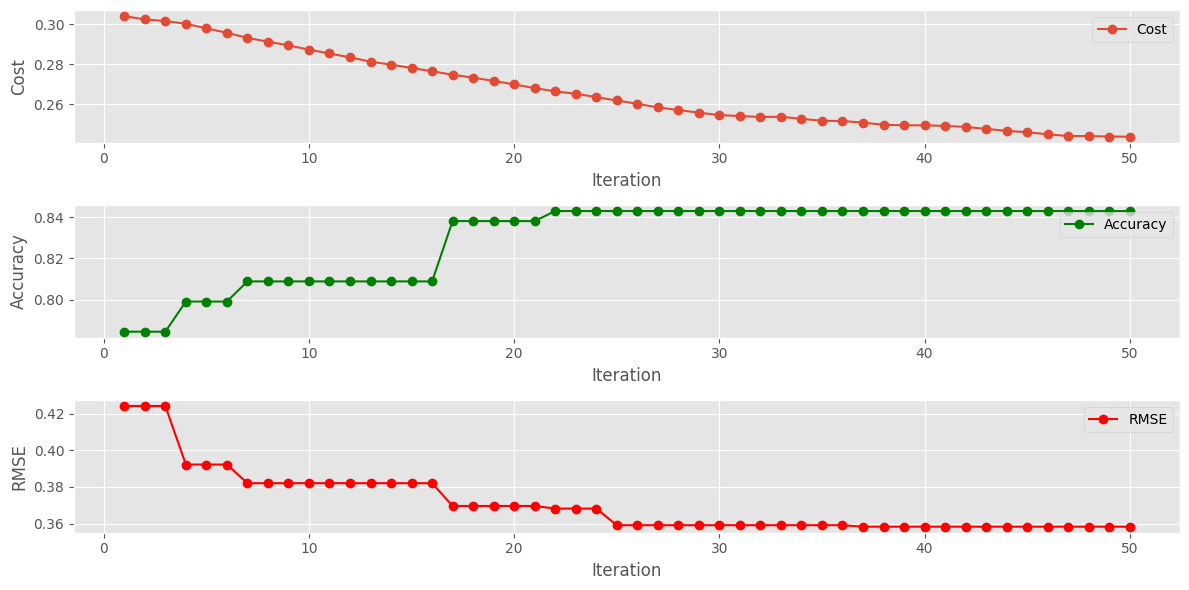

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

class JellyfishOptimization:
    def __init__(self, population_size, max_iterations, model, X, y):
        self.population_size = population_size
        self.max_iterations = max_iterations
        self.model = model
        self.X = X
        self.y = y
        self.cost_history = []
        self.accuracy_history = []
        self.rmse_history = []

    def cost_function(self, individual):
        selected_features = [i for i, bit in enumerate(individual) if bit == 1]
        if not selected_features:
            return float('inf')
        X_selected = self.X[:, selected_features]
        skf = StratifiedKFold(n_splits=5)
        accuracy_scores = []
        rmse_scores = []

        for train_index, val_index in skf.split(X_selected, self.y):
            X_train, X_val = X_selected[train_index], X_selected[val_index]
            y_train, y_val = self.y[train_index], self.y[val_index]
            self.model.fit(X_train, y_train)
            y_pred = self.model.predict(X_val)
            predicted_proba = self.model.predict_proba(X_val)[:, 1]
            accuracy_scores.append(accuracy_score(y_val, y_pred))
            rmse_scores.append(np.sqrt(mean_squared_error(y_val, predicted_proba)))

        accuracy_mean = np.mean(accuracy_scores)
        rmse_mean = np.mean(rmse_scores)

        cost = (1 - accuracy_mean) + 0.2 * rmse_mean
        return cost

    def mutate(self, individual, mutation_rate=0.05):
        individual = np.copy(individual)
        for i in range(len(individual)):
            if np.random.rand() < mutation_rate:
                individual[i] = 1 - individual[i]
        return individual

    def crossover(self, parent1, parent2):
        child1, child2 = np.copy(parent1), np.copy(parent2)
        for i in range(len(parent1)):
            if np.random.rand() < 0.5:
                child1[i], child2[i] = parent2[i], parent1[i]
        return child1, child2

    def smooth_curve(self, points, factor=0.95):
        smoothed_points = []
        for point in points:
            if smoothed_points:
                smoothed_points.append(smoothed_points[-1] * factor + point * (1 - factor))
            else:
                smoothed_points.append(point)
        return smoothed_points

    def optimize(self):
        population = np.random.randint(2, size=(self.population_size, self.X.shape[1]))
        best_individual = None
        best_cost = float('inf')

        for iteration in range(self.max_iterations):
            iteration_cost = []
            iteration_accuracy = []
            iteration_rmse = []

            for individual in population:
                cost = self.cost_function(individual)
                iteration_cost.append(cost)

                if cost < best_cost:
                    best_cost = cost
                    best_individual = individual

            selected_features = [i for i, bit in enumerate(best_individual) if bit == 1]
            if selected_features:
                X_selected = self.X[:, selected_features]
                X_train, X_test, y_train, y_test = train_test_split(X_selected, self.y, test_size=0.2, random_state=21)
                scaler = StandardScaler()
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.transform(X_test)

                self.model.fit(X_train, y_train)
                y_pred = self.model.predict(X_test)
                predicted_proba = self.model.predict_proba(X_test)[:, 1]
                accuracy = accuracy_score(y_test, y_pred)
                rmse = np.sqrt(mean_squared_error(y_test, predicted_proba))

                iteration_accuracy.append(accuracy)
                iteration_rmse.append(rmse)

            self.cost_history.append(np.mean(iteration_cost))
            self.accuracy_history.append(np.mean(iteration_accuracy) if iteration_accuracy else 0)
            self.rmse_history.append(np.mean(iteration_rmse) if iteration_rmse else 0)

            sorted_population = sorted(zip(population, iteration_cost), key=lambda x: x[1])
            top_individuals = [ind for ind, cost in sorted_population[:self.population_size // 2]]
            new_population = []

            while len(new_population) < self.population_size:
                parent1, parent2 = np.random.choice(len(top_individuals), 2, replace=False)
                parent1 = top_individuals[parent1]
                parent2 = top_individuals[parent2]
                child1, child2 = self.crossover(parent1, parent2)
                new_population.append(self.mutate(child1))
                if len(new_population) < self.population_size:
                    new_population.append(self.mutate(child2))

            new_population[0] = best_individual

            population = np.array(new_population)

        return best_individual

X = pd.get_dummies(df2.drop(['HeartDisease'], axis=1)).values
y = df2['HeartDisease'].values

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

sgd = SGDClassifier(loss='log_loss', random_state=42)

joa = JellyfishOptimization(population_size=10, max_iterations=51, model=sgd, X=X_resampled, y=y_resampled)
best_features = joa.optimize()

cost_history = joa.smooth_curve(joa.cost_history)
accuracy_history = joa.accuracy_history
rmse_history = joa.rmse_history

plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(range(1, len(cost_history)), cost_history[1:], marker='o', label='Cost')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(range(1, len(accuracy_history)), accuracy_history[1:], marker='o', label='Accuracy', color='green')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(range(1, len(rmse_history)), rmse_history[1:], marker='o', label='RMSE', color='red')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()

Distribusi kelas sebelum SMOTE: Counter({1: 508, 0: 410})
Distribusi kelas setelah SMOTE: Counter({0: 508, 1: 508})


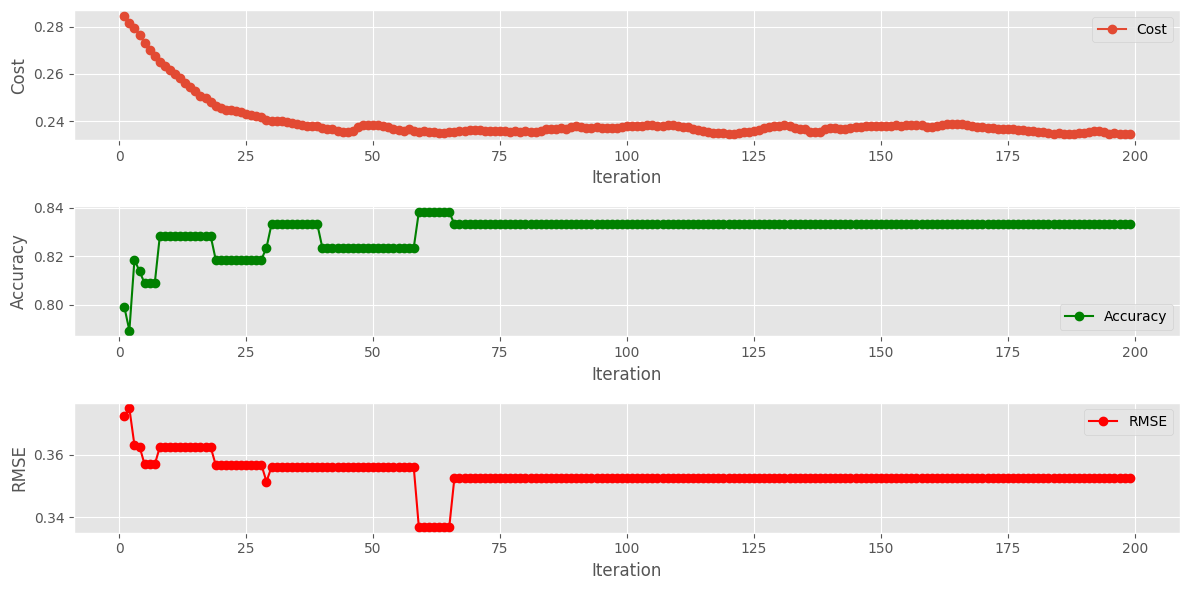

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

class JellyfishOptimization:
    def __init__(self, population_size, max_iterations, model, X, y):
        self.population_size = population_size
        self.max_iterations = max_iterations
        self.model = model
        self.X = X
        self.y = y
        self.cost_history = []
        self.accuracy_history = []
        self.rmse_history = []

    def cost_function(self, individual):
        selected_features = [i for i, bit in enumerate(individual) if bit == 1]
        if not selected_features:
            return float('inf')
        X_selected = self.X[:, selected_features]
        skf = StratifiedKFold(n_splits=5)
        accuracy_scores = []
        rmse_scores = []

        for train_index, val_index in skf.split(X_selected, self.y):
            X_train, X_val = X_selected[train_index], X_selected[val_index]
            y_train, y_val = self.y[train_index], self.y[val_index]
            self.model.fit(X_train, y_train)
            y_pred = self.model.predict(X_val)
            predicted_proba = self.model.predict_proba(X_val)[:, 1]
            accuracy_scores.append(accuracy_score(y_val, y_pred))
            rmse_scores.append(np.sqrt(mean_squared_error(y_val, predicted_proba)))

        accuracy_mean = np.mean(accuracy_scores)
        rmse_mean = np.mean(rmse_scores)

        cost = (1 - accuracy_mean) + 0.2 * rmse_mean
        return cost

    def mutate(self, individual, mutation_rate=0.1):  # Increase mutation rate to 10%
        individual = np.copy(individual)
        for i in range(len(individual)):
            if np.random.rand() < mutation_rate:
                individual[i] = 1 - individual[i]
        return individual

    def crossover(self, parent1, parent2):
        child1, child2 = np.copy(parent1), np.copy(parent2)
        for i in range(len(parent1)):
            if np.random.rand() < 0.5:
                child1[i], child2[i] = parent2[i], parent1[i]
        return child1, child2

    def smooth_curve(self, points, factor=0.9):  # Reduce smoothing factor for more responsiveness
        smoothed_points = []
        for point in points:
            if smoothed_points:
                smoothed_points.append(smoothed_points[-1] * factor + point * (1 - factor))
            else:
                smoothed_points.append(point)
        return smoothed_points

    def optimize(self):
        population = np.random.randint(2, size=(self.population_size, self.X.shape[1]))
        best_individual = None
        best_cost = float('inf')

        for iteration in range(self.max_iterations):
            iteration_cost = []
            iteration_accuracy = []
            iteration_rmse = []

            for individual in population:
                cost = self.cost_function(individual)
                iteration_cost.append(cost)

                if cost < best_cost:
                    best_cost = cost
                    best_individual = individual

            selected_features = [i for i, bit in enumerate(best_individual) if bit == 1]
            if selected_features:
                X_selected = self.X[:, selected_features]
                X_train, X_test, y_train, y_test = train_test_split(X_selected, self.y, test_size=0.2, random_state=21)
                scaler = StandardScaler()
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.transform(X_test)

                # Fit model and evaluate
                self.model.fit(X_train, y_train)
                y_pred = self.model.predict(X_test)
                predicted_proba = self.model.predict_proba(X_test)[:, 1]
                accuracy = accuracy_score(y_test, y_pred)
                rmse = np.sqrt(mean_squared_error(y_test, predicted_proba))

                iteration_accuracy.append(accuracy)
                iteration_rmse.append(rmse)

            self.cost_history.append(np.mean(iteration_cost))
            self.accuracy_history.append(np.mean(iteration_accuracy) if iteration_accuracy else 0)
            self.rmse_history.append(np.mean(iteration_rmse) if iteration_rmse else 0)

            sorted_population = sorted(zip(population, iteration_cost), key=lambda x: x[1])
            top_individuals = [ind for ind, cost in sorted_population[:self.population_size // 2]]
            new_population = []

            while len(new_population) < self.population_size:
                parent1, parent2 = np.random.choice(len(top_individuals), 2, replace=False)
                parent1 = top_individuals[parent1]
                parent2 = top_individuals[parent2]
                child1, child2 = self.crossover(parent1, parent2)
                new_population.append(self.mutate(child1))
                if len(new_population) < self.population_size:
                    new_population.append(self.mutate(child2))

            new_population[0] = best_individual

            population = np.array(new_population)

        return best_individual

# Cek distribusi awal sebelum SMOTE
from collections import Counter

print("Distribusi kelas sebelum SMOTE:", Counter(y))

# Load and preprocess the data
X = pd.get_dummies(df2.drop(['HeartDisease'], axis=1)).values
y = df2['HeartDisease'].values

# Gunakan SMOTE dengan sampling_strategy 'auto' untuk menyeimbangkan data secara otomatis
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Menggunakan rasio otomatis
X_resampled, y_resampled = smote.fit_resample(X, y)

# Cek distribusi setelah SMOTE
print("Distribusi kelas setelah SMOTE:", Counter(y_resampled))

# Standardize the data
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Define SGDClassifier with more aggressive regularization and iterations
sgd = SGDClassifier(loss='log_loss', alpha=0.0005, penalty='l2', max_iter=2000, random_state=449)

# Apply Jellyfish Optimization with increased population size and iterations
joa = JellyfishOptimization(population_size=30, max_iterations=200, model=sgd, X=X_resampled, y=y_resampled)
best_features = joa.optimize()

# Smooth cost, accuracy, and RMSE curves
cost_history = joa.smooth_curve(joa.cost_history)
accuracy_history = joa.accuracy_history
rmse_history = joa.rmse_history

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(range(1, len(cost_history)), cost_history[1:], marker='o', label='Cost')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(range(1, len(accuracy_history)), accuracy_history[1:], marker='o', label='Accuracy', color='green')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(range(1, len(rmse_history)), rmse_history[1:], marker='o', label='RMSE', color='red')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()

